<a href="https://colab.research.google.com/github/mikemenj/mikemenj/blob/main/r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

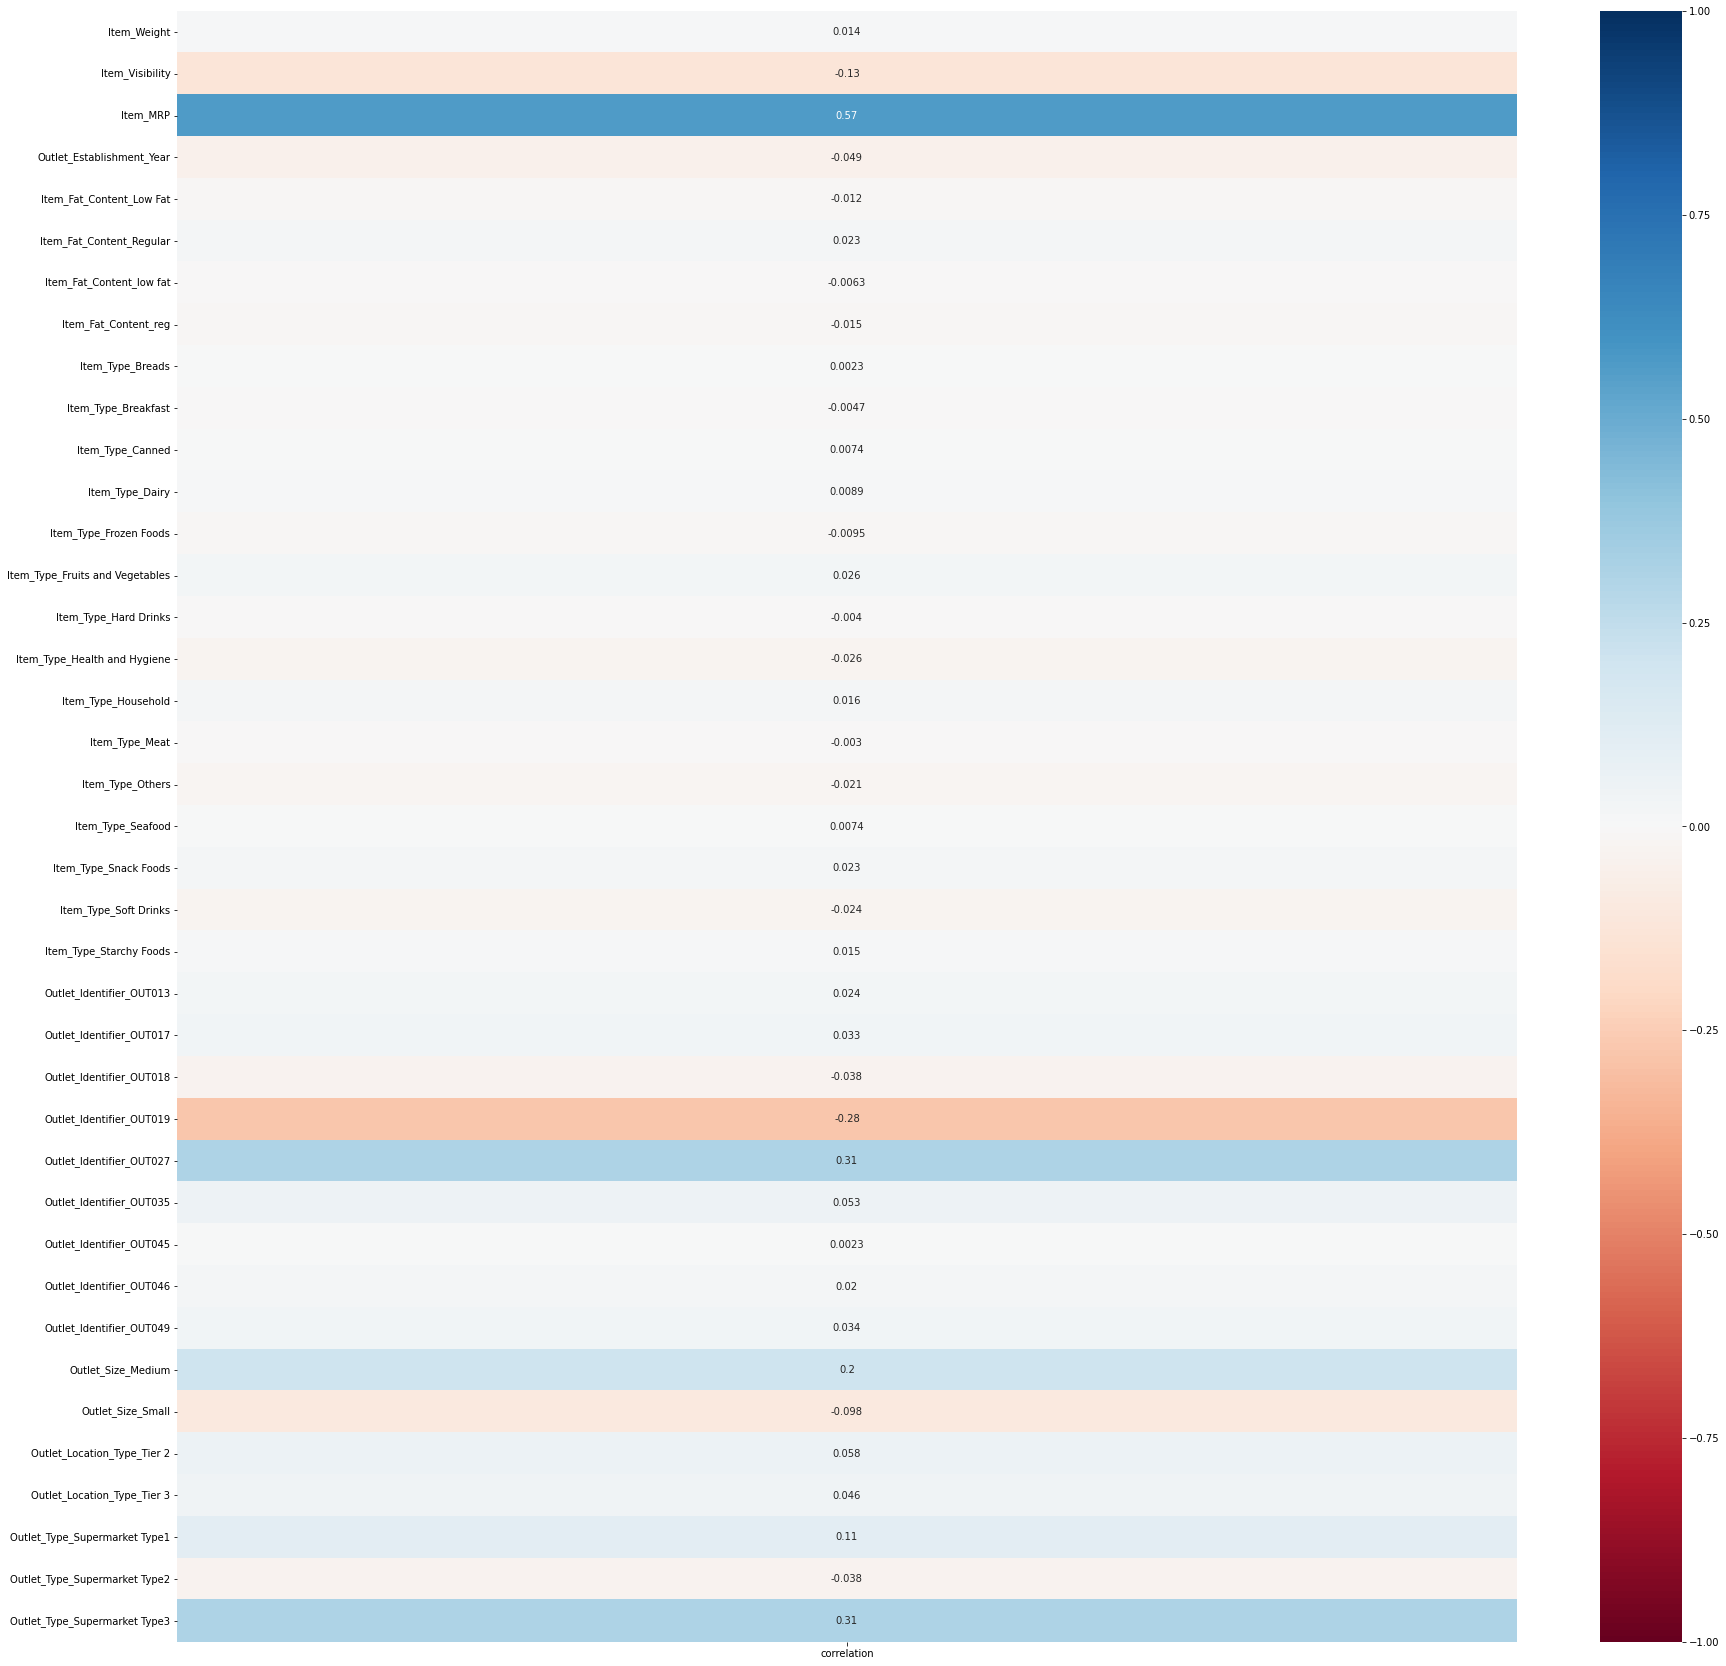

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSluepdRgArMMr7UNy-EQUgZqemlRAe_19THlveO6kkh4nUtJ-ukHy2qvE5aYhj3L6YkOPMJc8Go_oz/pub?gid=1284655454&single=true&output=csv")

# Remove the Item_Identifier column
data.drop('Item_Identifier', axis=1, inplace=True)

# Select the features and target variable
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# One-hot encode the categorical columns
X = pd.get_dummies(X, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)

# Calculate the pairwise correlation between all the features and y
corr = X.corrwith(y)

# Convert the correlation to a one-row dataframe
corr_df = pd.DataFrame(corr, columns=['correlation'])

# Plot the correlation as a heatmap
plt.figure(figsize=(30,30))
sns.heatmap(corr_df, cmap='RdBu', vmin=-1, vmax=1, annot = True)


In [4]:
# Filter the columns with correlation above .1
correlated_cols = corr_df[corr_df['correlation'].abs() > 0.1].index


In [5]:
# Split the filtered columns into two sets, one set for numerical columns and one set for categorical columns
num_columns = X_train_preprocessed[correlated_cols].select_dtypes(include=['float64']).columns
cat_columns = X_train_preprocessed[correlated_cols].select_dtypes(include=['object']).columns


NameError: ignored

In [ ]:
# Imputers
mean_imputer = SimpleImputer(strategy='mean') #mean strategy for numeric cols
freq_imputer = SimpleImputer(strategy='most_frequent') #most frequent for cat cols

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Scaler
scaler = StandardScaler() #scaler for numeric columns
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)

number_tuple = (numeric_pipe, num_columns)
category_tuple = (categorical_pipe, 


In [ ]:
linReg_model = LinearRegression()
linReg_model.fit(X_train_preprocessed[correlated_cols], y_train)


In [ ]:
y_pred = linReg_model.predict(X_test_preprocessed[correlated_cols])


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data using the fitted model
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error: ", mse)
print("R^2 score: ", r2)
